## Apply GC test to determine VAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

import yfinance as yf

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
## https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
def grangers_causation_matrix(data, variables,test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=10, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(10)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            #opt_lag = 1 + np.argmin(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [4]:
def gc_optimal_lag(data, variables,test='ssr_chi2test', verbose=False):    
    test_result = grangercausalitytests(data[variables], maxlag=10, verbose=False)
    p_values = [round(test_result[i+1][0][test][1],4) for i in range(10)]
    min_p_value = np.min(p_values)
    opt_lag = 1 + np.argmin(p_values)
    return (opt_lag, min_p_value)        

In [5]:
google = yf.Ticker("GOOG")
apple = yf.Ticker("AAPL")
microsoft = yf.Ticker("MSFT")
nvidia = yf.Ticker("NVDA")
amazon = yf.Ticker("AMZN")
meta = yf.Ticker("META")
tsmc = yf.Ticker("TSM")

google_data = google.history(start='2023-01-01', end='2024-01-01')
apple_data = apple.history(start='2023-01-01', end='2024-01-01')
microsoft_data = microsoft.history(start='2023-01-01', end='2024-01-01')
nvidia_data = nvidia.history(start='2023-01-01', end='2024-01-01')
amazon_data = amazon.history(start='2023-01-01', end='2024-01-01')
meta_data = meta.history(start='2023-01-01', end='2024-01-01')
tsm_data = tsmc.history(start='2023-01-01', end='2024-01-01')

In [6]:
close_df = pd.DataFrame()
close_df["Apple"] = apple_data.Close
close_df["Google"] = google_data.Close
close_df["Microsoft"] = microsoft_data.Close
close_df["Nvidia"] = nvidia_data.Close
close_df["Amazon"] = amazon_data.Close
close_df["Meta"] = meta_data.Close
close_df["TSMC"] = tsm_data.Close
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,TSMC
Date,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609238,143.079788,85.820000,124.607788,72.324837
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259186,147.417679,85.139999,127.235008,74.562096
2023-01-05 00:00:00-05:00,123.998451,86.769997,219.553360,142.580048,83.120003,126.805458,73.985687
2023-01-06 00:00:00-05:00,128.560852,88.160004,222.140869,148.517136,86.080002,129.882202,76.271774
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303711,156.203369,87.360001,129.332779,78.460182
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,102.732819
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,104.027557
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,104.226753


In [7]:
stationary_df = pd.DataFrame()
stationary_df["Apple Adj Close Diff"] = apple_data.Close.diff()
stationary_df["Google Adj Close Diff"] = google_data.Close.diff()
stationary_df["Microsoft Adj Close Diff"] = microsoft_data.Close.diff()
stationary_df["Nvidia Adj Close Diff"] = nvidia_data.Close.diff()
stationary_df["Amazon Adj Close Diff"] = amazon_data.Close.diff()
stationary_df["Meta Adj Close Diff"] = meta_data.Close.diff()
stationary_df["TSMC Adj Close Diff"] = meta_data.Close.diff()

stationary_df["Apple Daily Return"] = apple_data.Close.pct_change()
stationary_df["Google Daily Return"] = google_data.Close.pct_change()
stationary_df["Microsoft Daily Return"] = microsoft_data.Close.pct_change()
stationary_df["Nvidia Daily Return"] = nvidia_data.Close.pct_change()
stationary_df["Amazon Daily Return"] = amazon_data.Close.pct_change()
stationary_df["Meta Daily Return"] = meta_data.Close.pct_change()
stationary_df["TSMC Daily Return"] = meta_data.Close.pct_change()
stationary_df = stationary_df.dropna()

In [8]:
grangers_causation_matrix(stationary_df, variables=stationary_df.columns)

,Apple Adj Close Diff_x,Google Adj Close Diff_x,Microsoft Adj Close Diff_x,Nvidia Adj Close Diff_x,Amazon Adj Close Diff_x,Meta Adj Close Diff_x,TSMC Adj Close Diff_x,Apple Daily Return_x,Google Daily Return_x,Microsoft Daily Return_x,Nvidia Daily Return_x,Amazon Daily Return_x,Meta Daily Return_x,TSMC Daily Return_x
Apple Adj Close Diff_y,1.0000,0.5876,0.4740,0.0158,0.4873,0.5645,0.5645,0.4980,0.7154,0.3399,0.0064,0.3781,0.2704,0.2704
Google Adj Close Diff_y,0.0713,1.0000,0.2047,0.2592,0.1273,0.0957,0.0957,0.0731,0.6000,0.1933,0.2824,0.1034,0.0140,0.0140
Microsoft Adj Close Diff_y,0.1333,0.3904,1.0000,0.2939,0.5906,0.5403,0.5403,0.1497,0.4780,0.0203,0.3071,0.5287,0.4123,0.4123
Nvidia Adj Close Diff_y,0.6800,0.8959,0.2444,1.0000,0.3770,0.4903,0.4903,0.6444,0.9530,0.2122,0.2467,0.3894,0.5723,0.5723
Amazon Adj Close Diff_y,0.0023,0.0064,0.1589,0.0837,1.0000,0.0059,0.0059,0.0029,0.0071,0.1567,0.0276,0.0573,0.0019,0.0019
Meta Adj Close Diff_y,0.0194,0.0369,0.3946,0.2334,0.3620,1.0000,1.0000,0.0141,0.0218,0.2017,0.0402,0.3375,0.6727,0.6727
TSMC Adj Close Diff_y,0.0194,0.0369,0.3946,0.2334,0.3620,1.0000,1.0000,0.0141,0.0218,0.2017,0.0402,0.3375,0.6727,0.6727
Apple Daily Return_y,0.3570,0.5914,0.4377,0.0223,0.4191,0.4335,0.4335,1.0000,0.6834,0.2507,0.0040,0.2943,0.1638,0.1638
Google Daily Return_y,0.0618,0.5222,0.2037,0.4066,0.1863,0.0850,0.0850,0.0569,1.0000,0.1803,0.2557,0.1210,0.0071,0.0071
Microsoft Daily Return_y,0.0651,0.4391,0.0172,0.5740,0.7714,0.3988,0.3988,0.0682,0.5036,1.0000,0.4238,0.6859,0.3001,0.3001


We can use NVIDIA's Adj Close Diff and NVIDIA's Daily Return to predict Apple's Adj Close
We can use NVIDIA's Adj Close Diff and NVIDIA's Daily Return to predict Apple's Daily Return

<Axes: xlabel='Date'>

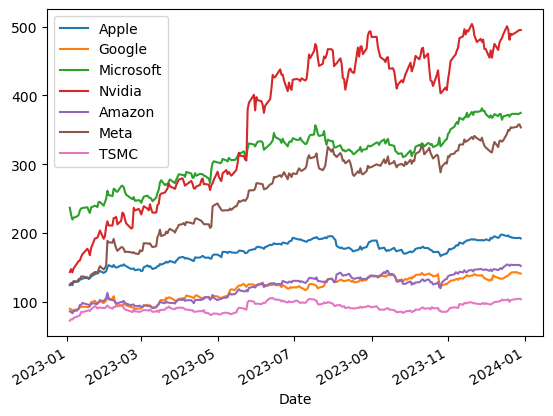

In [9]:
close_df.plot()

# Single window of five missing elements

In [10]:
close_df["Missing"] = close_df["Apple"]
close_df["Missing"].iloc[200:205] = np.nan

In [11]:
close_df[close_df["Missing"].isna()]

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,TSMC,Missing
Date,,,,,,,,
2023-10-19 00:00:00-04:00,174.768799,138.979996,329.444336,420.953247,128.399994,312.478455,92.100204,NaN
2023-10-20 00:00:00-04:00,172.198944,136.740005,324.820709,413.814209,125.169998,308.322845,90.514137,NaN
2023-10-23 00:00:00-04:00,172.318481,137.899994,327.455688,429.692047,126.559998,313.677185,90.315887,NaN
2023-10-24 00:00:00-04:00,172.756744,140.119995,328.658844,436.571136,128.559998,312.218719,90.841263,NaN
2023-10-25 00:00:00-04:00,170.425980,126.669998,338.741455,417.733673,121.389999,299.212524,86.876122,NaN


In [12]:
df = close_df.copy()
df = df.drop(['Google','Microsoft','Amazon','Meta','TSMC'], axis=1)
df['Adj Diff Missing'] = df['Missing'].diff()
df['VAR imputation'] = df['Adj Diff Missing'].ffill().bfill()
df['Nvidia Adj Diff'] = df['Nvidia'].diff()
df['Nvidia Daily Return'] = df['Nvidia'].pct_change()
df['Interpolating'] = df["Missing"].interpolate(method='linear')
df

,Apple,Nvidia,Missing,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Nvidia Daily Return,Interpolating
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,143.079788,124.048050,NaN,1.279457,NaN,NaN,124.048050
2023-01-04 00:00:00-05:00,125.327507,147.417679,125.327507,1.279457,1.279457,4.337891,0.030318,125.327507
2023-01-05 00:00:00-05:00,123.998451,142.580048,123.998451,-1.329056,-1.329056,-4.837631,-0.032816,123.998451
2023-01-06 00:00:00-05:00,128.560852,148.517136,128.560852,4.562401,4.562401,5.937088,0.041640,128.560852
2023-01-09 00:00:00-05:00,129.086548,156.203369,129.086548,0.525696,0.525696,7.686234,0.051753,129.086548
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,488.277069,193.091385,-1.077133,-1.077133,-1.599945,-0.003266,193.091385
2023-12-26 00:00:00-05:00,192.542831,492.766907,192.542831,-0.548553,-0.548553,4.489838,0.009195,192.542831
2023-12-27 00:00:00-05:00,192.642548,494.146820,192.642548,0.099716,0.099716,1.379913,0.002800,192.642548


In [13]:
df_imputation = df.copy()
df_imputation = df_imputation.drop(['Apple','Nvidia','Missing','Nvidia Daily Return'],axis=1)

# Drop the first row for daily return and Adj Close diff
df_imputation = df_imputation.drop(df_imputation.index[[0]])
df_imputation[df_imputation["Adj Diff Missing"].isna()]

,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Interpolating
Date,,,,
2023-10-19 00:00:00-04:00,NaN,-1.30484,-0.949829,173.661491
2023-10-20 00:00:00-04:00,NaN,-1.30484,-7.139038,172.175705
2023-10-23 00:00:00-04:00,NaN,-1.30484,15.877838,170.689919
2023-10-24 00:00:00-04:00,NaN,-1.30484,6.879089,169.204132
2023-10-25 00:00:00-04:00,NaN,-1.30484,-18.837463,167.718346
2023-10-26 00:00:00-04:00,NaN,-1.30484,-14.528046,166.232559


In [14]:
gc1 = grangercausalitytests(df_imputation[['VAR imputation', 'Nvidia Adj Diff']].dropna(), maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3540  , p=0.5524  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.3583  , p=0.5494  , df=1
likelihood ratio test: chi2=0.3581  , p=0.5496  , df=1
parameter F test:         F=0.3540  , p=0.5524  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8825  , p=0.1544  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=3.8428  , p=0.1464  , df=2
likelihood ratio test: chi2=3.8132  , p=0.1486  , df=2
parameter F test:         F=1.8825  , p=0.1544  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4987  , p=0.2156  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=4.6276  , p=0.2012  , df=3
likelihood ratio test: chi2=4.5847  , p=0.2049  , df=3
parameter F test:         F=1.4987  , p=0.2156  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3122  , p=0.0584  

In [15]:
if gc_optimal_lag(df_imputation,['VAR imputation', 'Nvidia Adj Diff'])[1] < 0.05:
    opt_lag = gc_optimal_lag(df_imputation,['VAR imputation', 'Nvidia Adj Diff'])[0]
else:
    opt_lag = np.nan

In [16]:
opt_lag

9

In [17]:
gc1

{1: ({'ssr_ftest': (0.3539783134187438, 0.5524187910453109, 245.0, 1),
   'ssr_chi2test': (0.3583127417463202, 0.5494447919724601, 1),
   'lrtest': (0.358054143983054, 0.5495889050986844, 1),
   'params_ftest': (0.3539783134187482, 0.5524187910453109, 245.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.8825171091785065, 0.15442864199439216, 242.0, 2),
   'ssr_chi2test': (3.842824181546207, 0.14640008589024398, 2),
   'lrtest': (3.8132373462997293, 0.14858194226659238, 2),
   'params_ftest': (1.882517109178534, 0.1544286419943878, 242.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.498652506330913, 0.21557098849864711, 239.0, 3),
   'ssr_chi2test': (4.627638283147338, 0.20118391168336522, 3),
   'lrtest': (4.584650066599352, 0.2048628380414252, 3),
   'params_ftest': (1.4986525063309095, 0.21557098849864711, 239.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

We do ffill/bfill in order to prepare the data for VAR model (forward fill to handle initial NaNs if necessary)

In [18]:
# Fit the VAR model
model = VAR(df_imputation.drop(columns = ["Adj Diff Missing"]))
sorted_model = model.select_order(maxlags=20)
sorted_model.summary()
#results = model.fit(maxlags=15)

C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,11.29,11.33,7.968e+04,11.30
1,-1.045,-0.8648,0.3518,-0.9721
2,-2.135,-1.820*,0.1183,-2.008*
3,-2.085,-1.635,0.1243,-1.904
4,-2.087,-1.503,0.1241,-1.851
5,-2.043,-1.323,0.1297,-1.753
6,-2.009,-1.155,0.1342,-1.665
7,-2.004,-1.014,0.1350,-1.605
8,-2.147*,-1.022,0.1172*,-1.693
9,-2.098,-0.8381,0.1232,-1.589


In [49]:
sorted_model

In [19]:
results = model.fit(opt_lag)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 31, May, 2024
Time:                     09:39:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.00611
Nobs:                     240.000    HQIC:                  -1.73348
Log likelihood:          -670.716    FPE:                   0.108486
AIC:                     -2.22433    Det(Omega_mle):       0.0779120
--------------------------------------------------------------------
Results for equation VAR imputation
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      3.266915         1.493551            2.187           0.029
L1.VAR imputation         -9.839635         9.893661           -0.995           0.320
L1.Nvidia Adj Diff         0.01

In [20]:
results.k_ar

9

In [21]:
df_imputation[df_imputation["Adj Diff Missing"].isna()]

,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Interpolating
Date,,,,
2023-10-19 00:00:00-04:00,NaN,-1.30484,-0.949829,173.661491
2023-10-20 00:00:00-04:00,NaN,-1.30484,-7.139038,172.175705
2023-10-23 00:00:00-04:00,NaN,-1.30484,15.877838,170.689919
2023-10-24 00:00:00-04:00,NaN,-1.30484,6.879089,169.204132
2023-10-25 00:00:00-04:00,NaN,-1.30484,-18.837463,167.718346
2023-10-26 00:00:00-04:00,NaN,-1.30484,-14.528046,166.232559


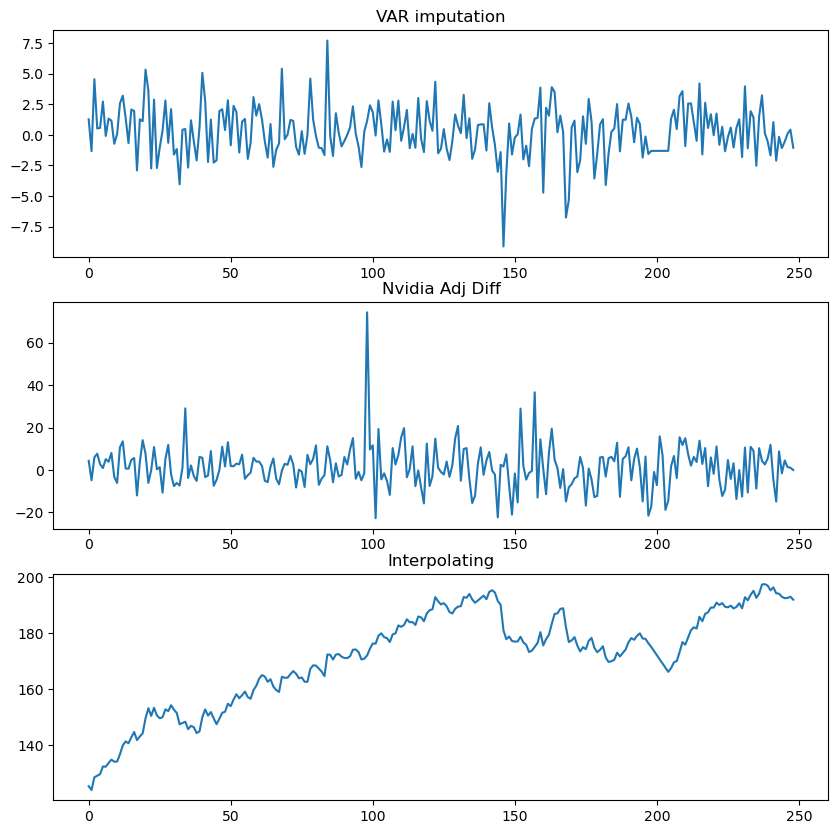

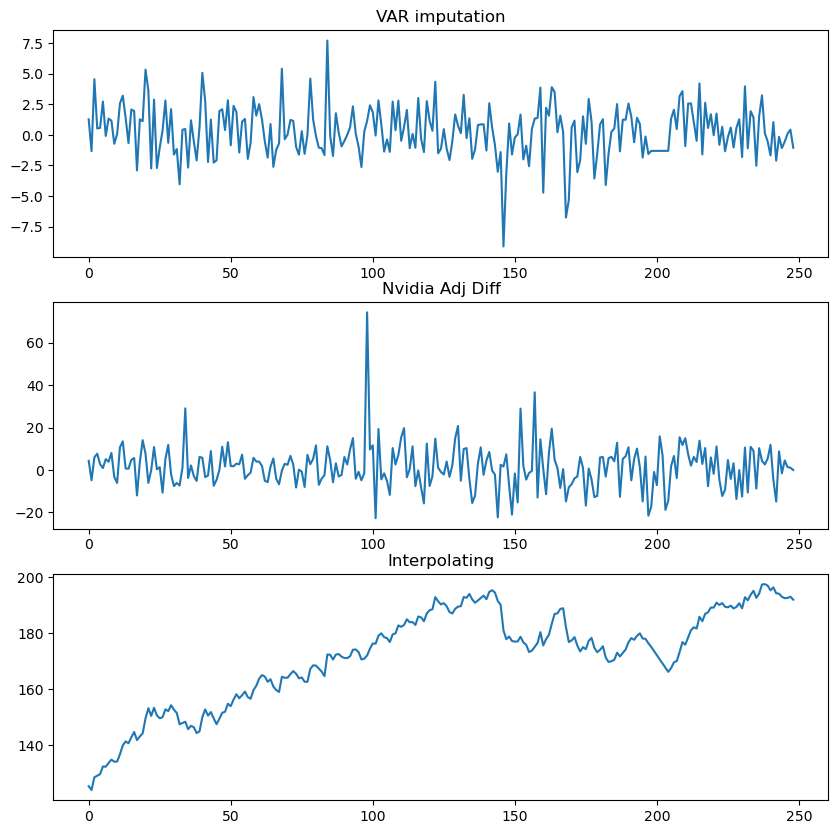

In [22]:
results.plot()

In [23]:
# Forecast missing values
def impute_missing_values(data, results):
    for i in range(len(data)):
        if np.isnan(data["Adj Diff Missing"].iloc[i]):  # Check if the Adj Diff Missing is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.drop(columns = ['Adj Diff Missing']).iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data["Adj Diff Missing"].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data


In [24]:
# Impute the missing values
imputed_data = impute_missing_values(df_imputation.copy(), results)

In [25]:
imputed_data[imputed_data["Adj Diff Missing"].isna()]

,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Interpolating
Date,,,,


In [67]:
results.k_ar

9

In [26]:
imputed_data

,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Interpolating
Date,,,,
2023-01-04 00:00:00-05:00,1.279457,1.279457,4.337891,125.327507
2023-01-05 00:00:00-05:00,-1.329056,-1.329056,-4.837631,123.998451
2023-01-06 00:00:00-05:00,4.562401,4.562401,5.937088,128.560852
2023-01-09 00:00:00-05:00,0.525696,0.525696,7.686234,129.086548
2023-01-10 00:00:00-05:00,0.575241,0.575241,2.808609,129.661789
...,...,...,...,...
2023-12-22 00:00:00-05:00,-1.077133,-1.077133,-1.599945,193.091385
2023-12-26 00:00:00-05:00,-0.548553,-0.548553,4.489838,192.542831
2023-12-27 00:00:00-05:00,0.099716,0.099716,1.379913,192.642548


In [27]:
df['Adj Diff Missing'] = imputed_data['Adj Diff Missing']

In [28]:
df[df['Missing'].isna()]

,Apple,Nvidia,Missing,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Nvidia Daily Return,Interpolating
Date,,,,,,,,
2023-10-19 00:00:00-04:00,174.768799,420.953247,NaN,-0.404396,-1.30484,-0.949829,-0.002251,173.661491
2023-10-20 00:00:00-04:00,172.198944,413.814209,NaN,-1.468921,-1.30484,-7.139038,-0.016959,172.175705
2023-10-23 00:00:00-04:00,172.318481,429.692047,NaN,-0.869522,-1.30484,15.877838,0.038369,170.689919
2023-10-24 00:00:00-04:00,172.756744,436.571136,NaN,-1.601069,-1.30484,6.879089,0.016009,169.204132
2023-10-25 00:00:00-04:00,170.425980,417.733673,NaN,-1.042622,-1.30484,-18.837463,-0.043149,167.718346


In [29]:
for i in range(len(df)):
    if np.isnan(df["Missing"].iloc[i]):
        df["Missing"].iloc[i] = df["Adj Diff Missing"].iloc[i]+df["Missing"].iloc[i-1]

In [30]:
df[df['Missing'].isna()]

,Apple,Nvidia,Missing,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Nvidia Daily Return,Interpolating
Date,,,,,,,,


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Apple                250 non-null    float64
 1   Nvidia               250 non-null    float64
 2   Missing              250 non-null    float64
 3   Adj Diff Missing     249 non-null    float64
 4   VAR imputation       250 non-null    float64
 5   Nvidia Adj Diff      249 non-null    float64
 6   Nvidia Daily Return  249 non-null    float64
 7   Interpolating        250 non-null    float64
dtypes: float64(8)
memory usage: 25.7 KB


In [54]:
df

,Apple,Nvidia,Missing,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Nvidia Daily Return,Interpolating
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,143.079788,124.048050,NaN,1.279457,NaN,NaN,124.048050
2023-01-04 00:00:00-05:00,125.327507,147.417679,125.327507,1.279457,1.279457,4.337891,0.030318,125.327507
2023-01-05 00:00:00-05:00,123.998451,142.580048,123.998451,-1.329056,-1.329056,-4.837631,-0.032816,123.998451
2023-01-06 00:00:00-05:00,128.560852,148.517136,128.560852,4.562401,4.562401,5.937088,0.041640,128.560852
2023-01-09 00:00:00-05:00,129.086548,156.203369,129.086548,0.525696,0.525696,7.686234,0.051753,129.086548
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,488.277069,193.091385,-1.077133,-1.077133,-1.599945,-0.003266,193.091385
2023-12-26 00:00:00-05:00,192.542831,492.766907,192.542831,-0.548553,-0.548553,4.489838,0.009195,192.542831
2023-12-27 00:00:00-05:00,192.642548,494.146820,192.642548,0.099716,0.099716,1.379913,0.002800,192.642548


In [32]:
print(mean_squared_error(df["Missing"], df["Apple"])*(len(close_df)/5))
print(mean_squared_error(df["Interpolating"], df["Apple"])*(len(close_df)/5))

mses = {}
mses['Linear Interpolating'] = mean_squared_error(df["Interpolating"], df["Apple"])*(len(df)/5)
mses['VAR NVIDIA Diff'] = mean_squared_error(df["Missing"], df["Apple"])*(len(close_df)/5)


1.0843851209340916
4.766244586731773


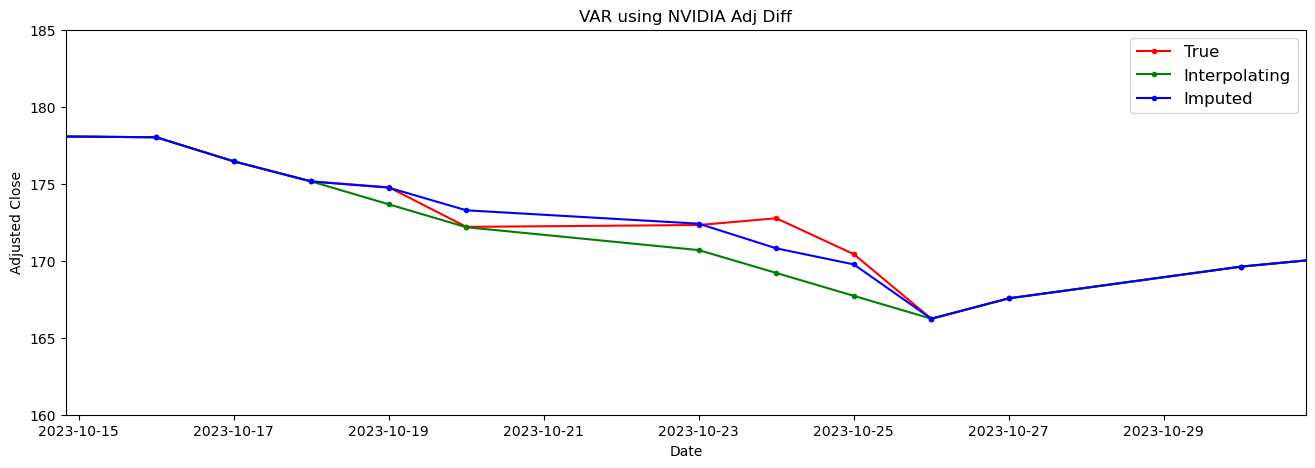

In [61]:
## Plot
plt.figure(figsize=((16,5)))

plt.plot(df['Apple'],'.-',color='r',label='True')
plt.plot(df['Interpolating'],'.-',color='g',label='Interpolating')
plt.plot(df['Missing'],'.-',color='b',label='Imputed')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Adjusted Close')

plt.xlim([datetime.date(2023, 10, 15), datetime.date(2023, 10, 31)])
plt.ylim([160,185])


plt.title('VAR using NVIDIA Adj Diff')

plt.show()

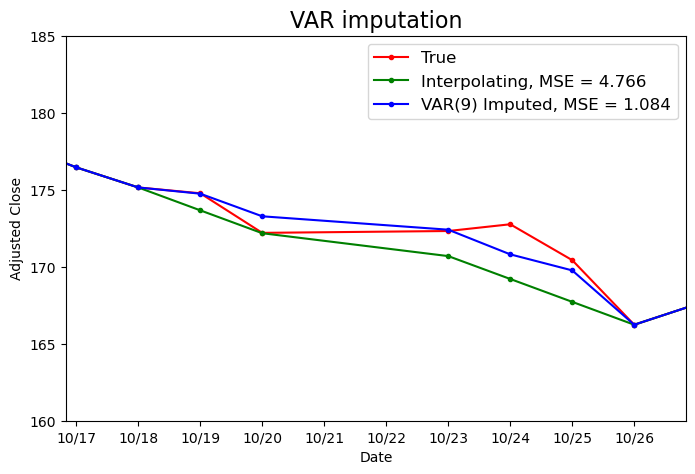

In [78]:
## Plot
import matplotlib.dates as mdates
plt.figure(figsize=((8,5)))

plt.plot(df['Apple'],'.-',color='r',label='True')
plt.plot(df['Interpolating'],'.-',color='g',label='Interpolating, MSE = 4.766')
plt.plot(df['Missing'],'.-',color='b',label='VAR(9) Imputed, MSE = 1.084')

plt.legend(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Adjusted Close')

plt.xlim([datetime.date(2023, 10, 17), datetime.date(2023, 10, 27)])
plt.ylim([160,185])

plt.title('VAR imputation', fontsize=16)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

plt.savefig('VAR_imputation_1.jpg')
plt.show()

In [65]:
mses

{'Linear Interpolating': 4.766244586731773,
 'VAR NVIDIA Diff': 1.0843851209340916,
 'VAR NVIDIA Diff and DR': 1.0843851209340916}

## VAR on both Nvidia daily return and difference

In [34]:
## VAR on both Nvidia daily return and difference
df_imputation_2 = df.copy()
df_imputation_2 = df_imputation_2.drop(['Apple','Nvidia','Missing','Interpolating'],axis=1)

# Drop the first row for daily return and Adj Close diff
df_imputation_2 = df_imputation_2.drop(df_imputation_2.index[[0]])
df_imputation_2

,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Nvidia Daily Return
Date,,,,
2023-01-04 00:00:00-05:00,1.279457,1.279457,4.337891,0.030318
2023-01-05 00:00:00-05:00,-1.329056,-1.329056,-4.837631,-0.032816
2023-01-06 00:00:00-05:00,4.562401,4.562401,5.937088,0.041640
2023-01-09 00:00:00-05:00,0.525696,0.525696,7.686234,0.051753
2023-01-10 00:00:00-05:00,0.575241,0.575241,2.808609,0.017980
...,...,...,...,...
2023-12-22 00:00:00-05:00,-1.077133,-1.077133,-1.599945,-0.003266
2023-12-26 00:00:00-05:00,-0.548553,-0.548553,4.489838,0.009195
2023-12-27 00:00:00-05:00,0.099716,0.099716,1.379913,0.002800


In [35]:
# Fit the VAR model
model_2 = VAR(df_imputation_2.drop(columns = ["Adj Diff Missing"]))
results_2 = model_2.fit(maxlags=15)

C:\Users\teres\anaconda3\envs\data_imputation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
results_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 31, May, 2024
Time:                     09:39:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.10918
Nobs:                     234.000    HQIC:                  -2.32532
Log likelihood:          -489.903    FPE:                  0.0436575
AIC:                     -3.14694    Det(Omega_mle):       0.0254819
--------------------------------------------------------------------
Results for equation VAR imputation
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.089474         0.170008            0.526           0.599
L1.VAR imputation               0.059046         0.078443            0.753           0.452
L1.Nvidia A

In [37]:
imputed_data_2 = impute_missing_values(df_imputation_2.copy(), results_2)

In [38]:
imputed_data_2

,Adj Diff Missing,VAR imputation,Nvidia Adj Diff,Nvidia Daily Return
Date,,,,
2023-01-04 00:00:00-05:00,1.279457,1.279457,4.337891,0.030318
2023-01-05 00:00:00-05:00,-1.329056,-1.329056,-4.837631,-0.032816
2023-01-06 00:00:00-05:00,4.562401,4.562401,5.937088,0.041640
2023-01-09 00:00:00-05:00,0.525696,0.525696,7.686234,0.051753
2023-01-10 00:00:00-05:00,0.575241,0.575241,2.808609,0.017980
...,...,...,...,...
2023-12-22 00:00:00-05:00,-1.077133,-1.077133,-1.599945,-0.003266
2023-12-26 00:00:00-05:00,-0.548553,-0.548553,4.489838,0.009195
2023-12-27 00:00:00-05:00,0.099716,0.099716,1.379913,0.002800


In [39]:
df2 = df.copy()
df2["Adj Diff Missing"] = imputed_data_2["Adj Diff Missing"]
for i in range(len(df2)):
    if np.isnan(df2["Missing"].iloc[i]):
        df2["Missing"].iloc[i] = df2["Adj Diff Missing"].iloc[i]+df2["Missing"].iloc[i-1]

In [40]:
(imputed_data["Adj Diff Missing"]==imputed_data_2["Adj Diff Missing"]).unique()

array([ True])

In [41]:
mses['VAR NVIDIA Diff and DR'] = mean_squared_error(df2["Missing"], df2["Apple"])*(len(close_df)/5)
mses

{'Linear Interpolating': 4.766244586731773,
 'VAR NVIDIA Diff': 1.0843851209340916,
 'VAR NVIDIA Diff and DR': 1.0843851209340916}

## Prediction from AAPL daily return